In [1]:
# installing dependencies
import pandas as pd
import numpy as np
import seaborn as sns
import pandas as pd
canada = pd.read_excel("C:/Users/chanhen/Desktop/Fall2023/CPIS342/assignments/covid19_raw.xlsx", sheet_name='Canada')
usa = pd.read_excel("C:/Users/chanhen/Desktop/Fall2023/CPIS342/assignments/covid19_raw.xlsx", sheet_name='USA')

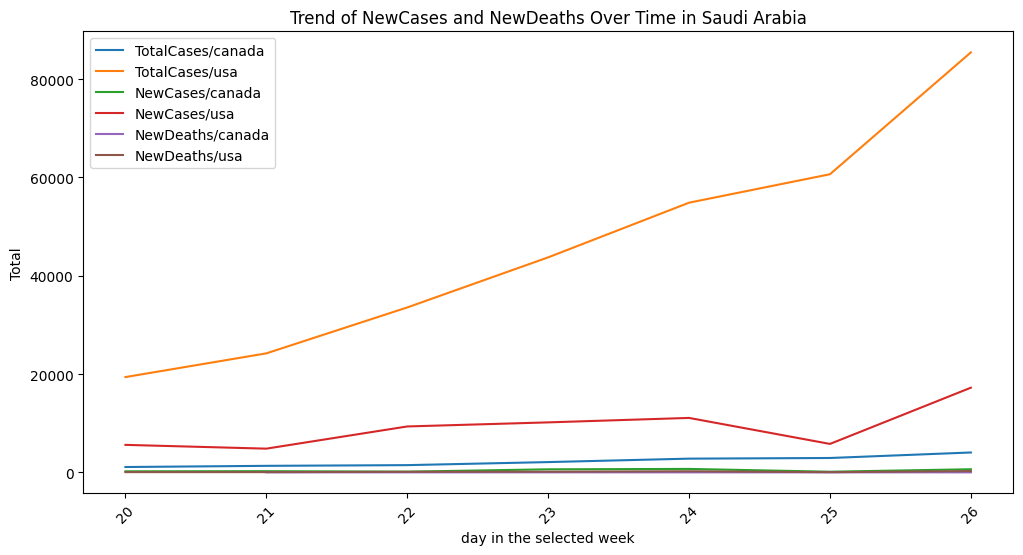

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Set the figure size
plt.figure(figsize=(12, 6))

# Define 'saudi' as the pandas DataFrame with columns 'Date', 'TotalCases', 'NewCases' and 'NewDeaths'
# Create a line plot to display the trend of 'TotalCases', 'NewCases' and 'NewDeaths' by 'Date'
sns.lineplot(x='Date', y='TotalCases', data=canada, label='TotalCases/canada')
sns.lineplot(x='Date', y='TotalCases', data=usa, label='TotalCases/usa')
sns.lineplot(x='Date', y='NewCases', data=canada, label='NewCases/canada')
sns.lineplot(x='Date', y='NewCases', data=usa, label='NewCases/usa')
sns.lineplot(x='Date', y='NewDeaths', data=canada, label='NewDeaths/canada')
sns.lineplot(x='Date', y='NewDeaths', data=usa, label='NewDeaths/usa')
# Add more lines for additional parameters as needed

# Rotate x-axis labels for better readability
plt.xticks(rotation=45)

# Set plot title and labels
plt.title('Trend of NewCases and NewDeaths Over Time in Saudi Arabia')
plt.xlabel('day in the selected week')
plt.ylabel('Total')

# Display the plot
plt.legend()
plt.show()

In [3]:
from sklearn.ensemble import HistGradientBoostingClassifier
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split

In [4]:
table = canada.add(usa, fill_value=0)
print(table)

   Date  TotalCases  NewCases  TotalDeaths  NewDeaths  TotalRecovered  \
0    40       20470      5808          268       49.0             161   
1    42       25535      5065          321       53.0             190   
2    44       35016      9481          439      118.0             192   
3    46       45825     10789          577      144.0             615   
4    48       57648     11776          806      227.0             491   
5    50       63565      5917          845       39.0             564   
6    52       89478     17858         1334      271.0            2096   

   ActiveCases  Serious,Critical  Tot Cases/1M pop  Tot Deaths/1M pop  
0        20041                65                88                NaN  
1        25024               638               108                NaN  
2        34385               796               140                NaN  
3        44633              1041               187                2.6  
4        56351              1176               240     

In [5]:
table.columns

Index(['Date', 'TotalCases', 'NewCases', 'TotalDeaths', 'NewDeaths',
       'TotalRecovered', 'ActiveCases', 'Serious,Critical', 'Tot Cases/1M pop',
       'Tot Deaths/1M pop'],
      dtype='object')

In [6]:
# Assuming 'sheet1' and 'sheet2' are your DataFrames
selected_columns_canada = ['Date']  # Replace with the actual column names from sheet2
selected_columns_table = ['TotalCases', 'NewCases', 'TotalDeaths', 'NewDeaths',
       'TotalRecovered', 'ActiveCases', 'Serious,Critical', 'Tot Cases/1M pop',
       'Tot Deaths/1M pop']  # Replace with the actual column names from sheet1

# Create a new DataFrame with selected columns from sheet1 and sheet2
merged = pd.concat([canada[selected_columns_canada], table[selected_columns_table]], axis=1)

# Display the new table
print(merged)

   Date  TotalCases  NewCases  TotalDeaths  NewDeaths  TotalRecovered  \
0    20       20470      5808          268       49.0             161   
1    21       25535      5065          321       53.0             190   
2    22       35016      9481          439      118.0             192   
3    23       45825     10789          577      144.0             615   
4    24       57648     11776          806      227.0             491   
5    25       63565      5917          845       39.0             564   
6    26       89478     17858         1334      271.0            2096   

   ActiveCases  Serious,Critical  Tot Cases/1M pop  Tot Deaths/1M pop  
0        20041                65                88                NaN  
1        25024               638               108                NaN  
2        34385               796               140                NaN  
3        44633              1041               187                2.6  
4        56351              1176               240     

In [7]:
merged.isnull().sum()

Date                 0
TotalCases           0
NewCases             0
TotalDeaths          0
NewDeaths            0
TotalRecovered       0
ActiveCases          0
Serious,Critical     0
Tot Cases/1M pop     0
Tot Deaths/1M pop    3
dtype: int64

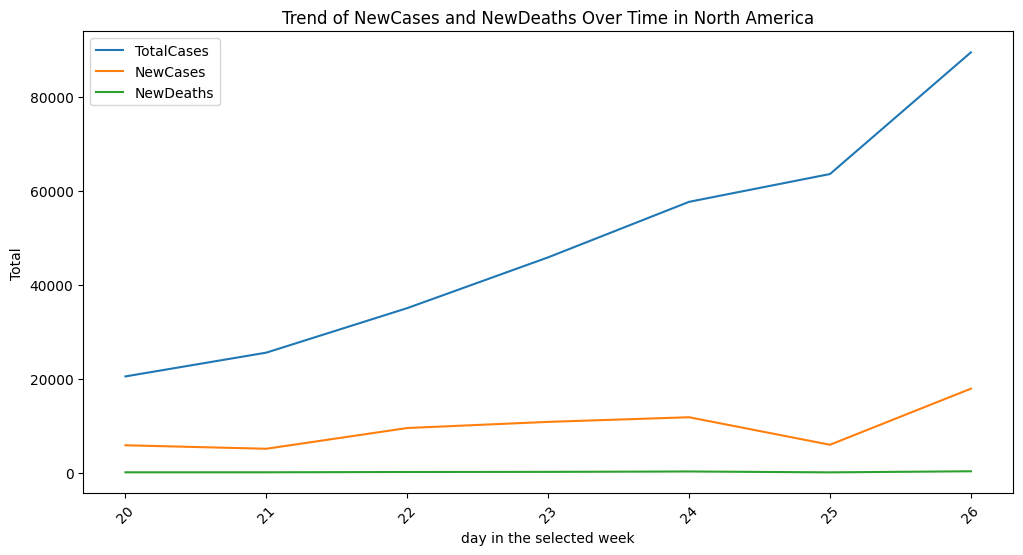

In [8]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Set the figure size
plt.figure(figsize=(12, 6))

# 'merged' represents combined data of USA and Canada
# Define 'merged' as the pandas DataFrame with columns 'Date', 'TotalCases', 'NewCases' and 'NewDeaths'
# Create a line plot to display the trend of 'TotalCases', 'NewCases' and 'NewDeaths' by 'Date'
sns.lineplot(x='Date', y='TotalCases', data=merged, label='TotalCases')
sns.lineplot(x='Date', y='NewCases', data=merged, label='NewCases')
sns.lineplot(x='Date', y='NewDeaths', data=merged, label='NewDeaths')
# Add more lines for additional parameters as needed

# Rotate x-axis labels for better readability
plt.xticks(rotation=45)

# Set plot title and labels
plt.title('Trend of NewCases and NewDeaths Over Time in North America')
plt.xlabel('day in the selected week')
plt.ylabel('Total')

# Display the plot
plt.legend()
plt.show()

In [9]:
from sklearn.ensemble import HistGradientBoostingClassifier
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split

In [10]:
# 'NewCase' is the dependent variable in linear regression, therefore it is the value of 'test'
train = merged
test = merged['NewCases']
X_train, X_test, y_train, y_test = train_test_split(train, test, test_size=0.3, random_state=2)

In [11]:
train.isnull().sum()

Date                 0
TotalCases           0
NewCases             0
TotalDeaths          0
NewDeaths            0
TotalRecovered       0
ActiveCases          0
Serious,Critical     0
Tot Cases/1M pop     0
Tot Deaths/1M pop    3
dtype: int64

In [12]:
#replace missing values with median
y_cleanTest = y_test.fillna(y_test.median())
X_cleanTest = X_test.fillna(X_test.median())

In [13]:
y_cleanTest.isnull().sum()

0

In [14]:
X_cleanTest.isnull().sum()

Date                 0
TotalCases           0
NewCases             0
TotalDeaths          0
NewDeaths            0
TotalRecovered       0
ActiveCases          0
Serious,Critical     0
Tot Cases/1M pop     0
Tot Deaths/1M pop    0
dtype: int64

In [15]:
from sklearn.linear_model import LinearRegression
regr = LinearRegression()
regr.fit(X_cleanTest, y_cleanTest)

LinearRegression()

In [16]:
pred = regr.predict(X_cleanTest)
pred
score = regr.score(X_cleanTest, y_cleanTest)
print("Hold-Out Score:", score)

Hold-Out Score: 1.0
